# 8.1 Demo - Part 2: State Maps  

- State Boundaries are built-in to pandas  
  - So no external Spatial (GeoJSON) file is needed  
  - Just the data (CSV/Excel) file that we're going to load into a dataframe and plot  


In [1]:
import pandas as pd
import plotly.express as px

# Read data file  
  - Data source: https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv    

 

In [2]:
df = pd.read_csv('Data/data.csv')

print(df.shape)
df.head()

(1034, 13)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,"Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).1","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).2","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).3","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).4","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).5","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).6","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).7","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).8","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).9"
0,Country,Data Source,Beverage Types,2019.00,2018.00,2017.00,2016.00,2015.0,2014.00,2013.00,2012.00,2011.00,2010.00
1,Afghanistan,Data source,Wine,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
2,Afghanistan,Data source,Beer,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.01
3,Afghanistan,Data source,Spirits,0.01,0.01,0.01,0.01,0.0,0.01,0.00,0.00,0.00,0.00
4,Afghanistan,Data source,All types,0.01,0.01,0.01,0.01,0.0,0.01,0.01,0.01,0.01,0.02


In [3]:
df.columns = df.iloc[0]

df =df.iloc[1:]

print(df.shape)
df.head()

(1033, 13)


,Country,Data Source,Beverage Types,2019.0,2018.0,2017.0,2016.0,2015.0,2014.0,2013.0,2012.0,2011.0,2010.0
1,Afghanistan,Data source,Wine,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
2,Afghanistan,Data source,Beer,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.01
3,Afghanistan,Data source,Spirits,0.01,0.01,0.01,0.01,0.0,0.01,0.00,0.00,0.00,0.00
4,Afghanistan,Data source,All types,0.01,0.01,0.01,0.01,0.0,0.01,0.01,0.01,0.01,0.02
5,Afghanistan,Data source,Other alcoholic beverages,0.00,0.00,0.00,0.00,0.0,0.00,0.01,0.01,0.01,0.01


In [7]:
df_melt = df.melt(id_vars=['Beverage Types'], 
                  var_name="Year", 
                  value_name="Beer Consumption")

print(df_melt.shape)
df_melt.head(10)

(12396, 3)


,Beverage Types,Beer Consumption,Year
0,Wine,Country,Afghanistan
1,Beer,Country,Afghanistan
2,Spirits,Country,Afghanistan
3,All types,Country,Afghanistan
4,Other alcoholic beverages,Country,Afghanistan
5,Spirits,Country,Albania
6,Beer,Country,Albania
7,Wine,Country,Albania
8,All types,Country,Albania
9,Other alcoholic beverages,Country,Albania


# Plot US State Map


- Use **locationmode='USA-states'**       


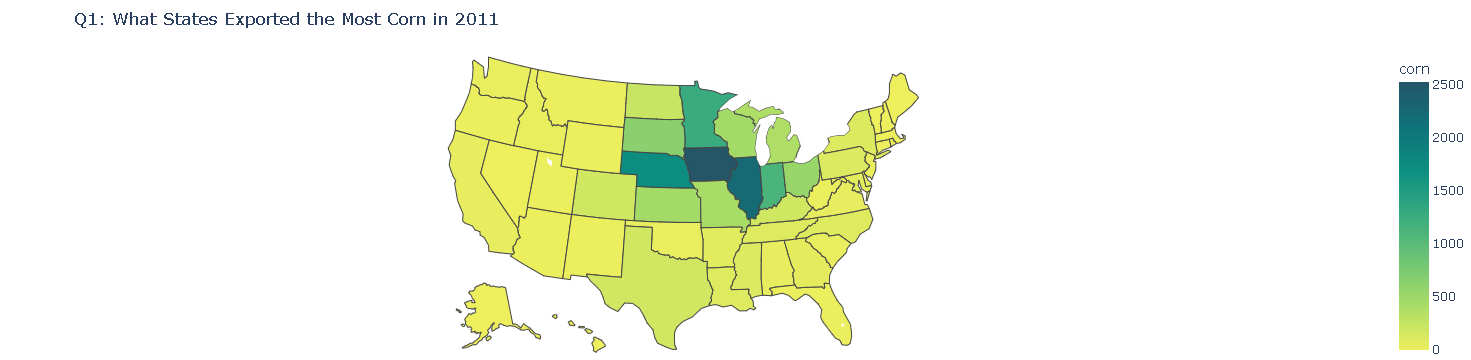

In [6]:
fig = px.choropleth(df,                                 
                    locations='code', #'State_Abbreviation',              
                    locationmode='USA-states', 
                    scope="usa",
                    color='corn',  
                    hover_name='state',
                    color_continuous_scale='aggrnyl_r', 
                    title="Q1: What States Exported the Most Corn in 2011"
                   )

fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})

fig.show()

In [11]:
selected_states = ['Georgia', 'North Carolina','South Carolina','Florida','Alabama','Mississippi']

df_se = df.query("state in @selected_states")

print(df_se.shape)
df_se

(6, 17)


,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61
8,FL,Florida,state,3764.09,42.6,0.9,56.9,66.31,438.2,933.1,1371.36,171.9,279.0,450.86,3.5,1.8,78.24
9,GA,Georgia,state,2860.84,31.0,18.9,630.4,38.38,74.6,158.9,233.51,59.0,95.8,154.77,57.8,65.4,1154.07
23,MS,Mississippi,state,2170.80,12.8,30.4,370.8,5.45,5.4,11.6,17.04,10.6,17.2,27.87,110.0,102.2,494.75
32,NC,North Carolina,state,3806.05,24.8,702.8,598.4,24.90,23.8,50.7,74.47,57.4,93.1,150.45,92.2,200.3,470.86
39,SC,South Carolina,state,929.93,15.2,10.9,186.5,7.62,17.1,36.4,53.45,16.3,26.4,42.66,32.1,55.3,206.10


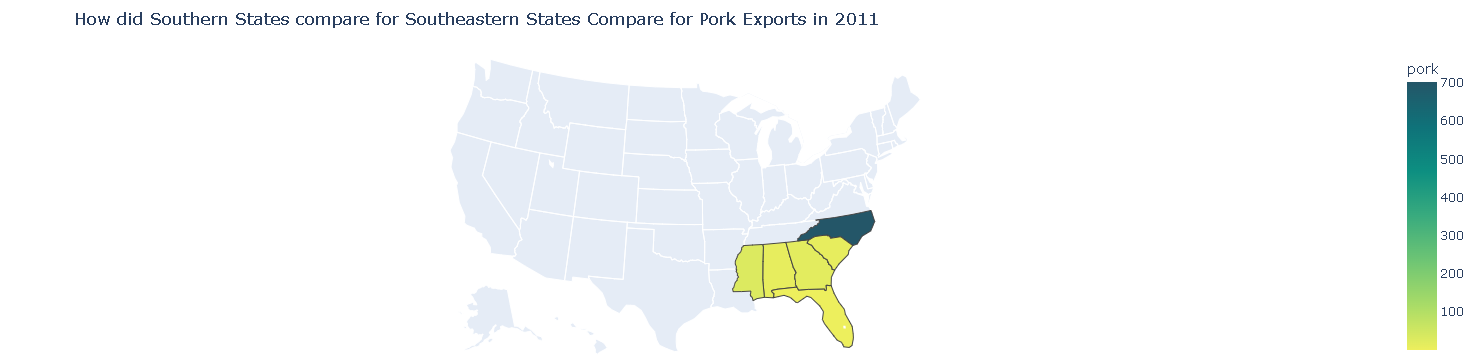

In [13]:
fig = px.choropleth(df_se,                                 
                    locations='code', #'State_Abbreviation',              
                    locationmode='USA-states', 
                    scope="usa",
                    color='pork',  
                    hover_name='state',
                    color_continuous_scale='aggrnyl_r', 
                    title="How did Southern States compare for Southeastern States Compare for Pork Exports in 2011"
                   )

fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})

fig.show()